In [9]:
import numpy as np
from sklearn import datasets

from sklearn.decomposition import PCA
from resurces.FDA import FDA, KPCA_FDA

from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer

from collections import Counter

from imblearn.over_sampling import RandomOverSampler

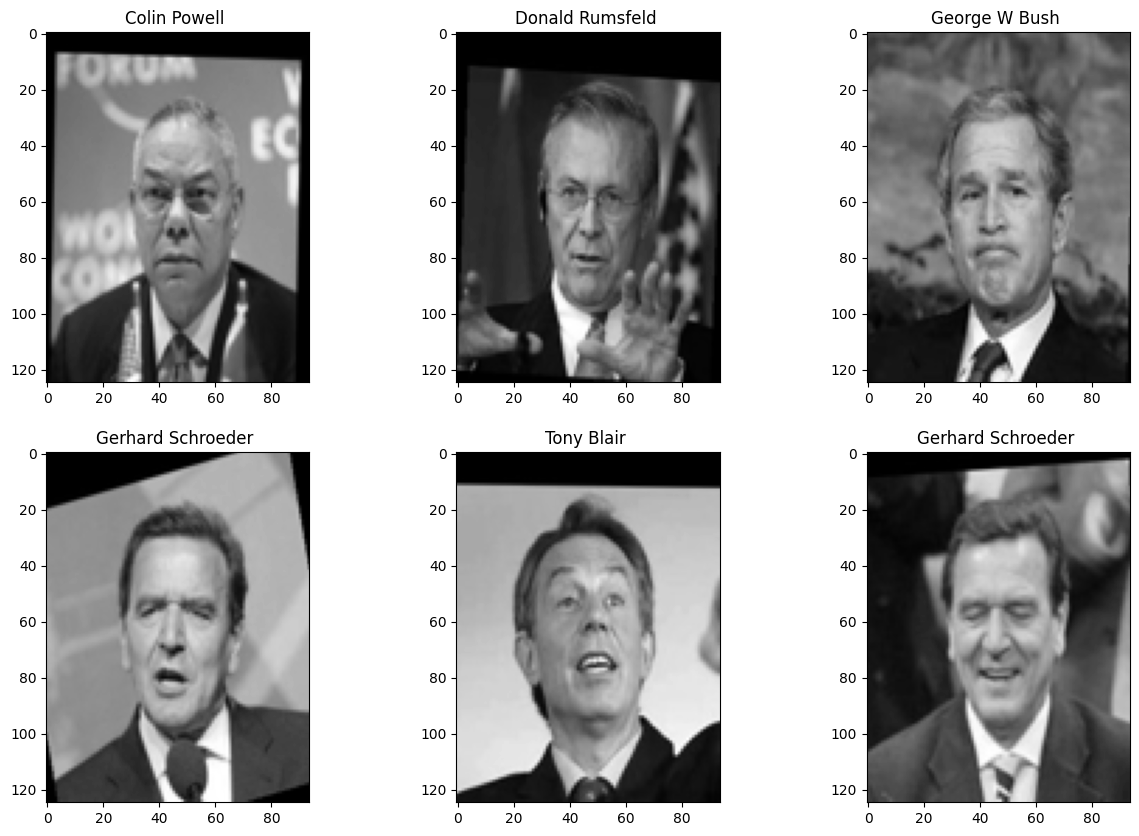

In [10]:
#importazione del Dataset

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=100, resize=1)
face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']

#print(lfw_people['DESCR'])#Mostriamo una foto per ogniuno delle persone presenti nel dataset
face_data_df = pd.DataFrame(face_data)

face_targets_df = pd.DataFrame({'target': face_targets, 'target_names': [face_tnames[t] for t in face_targets]})

class_indices = {}

for name in face_tnames:
    class_indices[name] = face_targets_df.loc[face_targets_df['target_names']==name].index.to_list()

fig1, axs1 = plt.subplots(2, 3, figsize=(15, 10))

axs1[0][0].imshow(face_images[class_indices[face_tnames[0]][0]], cmap=plt.cm.gray)
axs1[0][0].set_title('{} '.format(face_tnames[0]))

axs1[0][1].imshow(face_images[class_indices[face_tnames[1]][0]], cmap=plt.cm.gray)
axs1[0][1].set_title('{} '.format(face_tnames[1]))

axs1[0][2].imshow(face_images[class_indices[face_tnames[2]][0]], cmap=plt.cm.gray)
axs1[0][2].set_title('{} '.format(face_tnames[2]))

axs1[1][0].imshow(face_images[class_indices[face_tnames[3]][0]], cmap=plt.cm.gray)
axs1[1][0].set_title('{} '.format(face_tnames[3]))

axs1[1][1].imshow(face_images[class_indices[face_tnames[4]][0]], cmap=plt.cm.gray)
axs1[1][1].set_title('{} '.format(face_tnames[4]))

axs1[1][2].imshow(face_images[10], cmap=plt.cm.gray)
axs1[1][2].set_title('{} '.format(face_tnames[face_targets[10]]))

fig1

plt.show()

Text(0.5, 1.0, 'Immagine Riscalata')

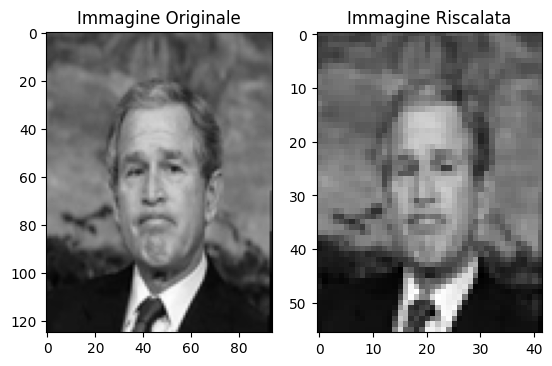

In [11]:
lfw_people_low = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.45)
face_images_low = lfw_people_low['images']

fig1, axs1 = plt.subplots(1, 2)

axs1[0].imshow(face_images[0], cmap=plt.cm.gray)
axs1[0].set_title('Immagine Originale')

axs1[1].imshow(face_images_low[0], cmap=plt.cm.gray)
axs1[1].set_title('Immagine Riscalata')